# Constant

# Load data

In [71]:
import pandas as pd

data = pd.read_csv("dataset2020.csv")
mapping = {'pe-legit': 0, 'pe-malicious': 1}
data.iloc[:,0].replace(mapping, inplace=True)

X=data.iloc[:,1:].values
Y=data.iloc[:,0].values


# process data

In [72]:
from numpy import array
import numpy as np
from tensorflow.keras.utils import *

feature=array(X)
label=array(Y)
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = 2)

arr = []
for i in feature:
  arr.append(np.reshape(i, (1, 486)).tolist())
feature = np.array(arr)

print(label.shape, feature.shape)
print(label)


(49128, 2) (49128, 1, 486)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Split train-test data

In [73]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train,Y_test = train_test_split(feature, label,test_size=1 / 5, random_state=0)
print(Y_test)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Create model

In [74]:
import keras.backend as K
def f1_score(y_true, y_pred, threshold_shift=0):
    beta = 2

    y_pred = K.clip(y_pred, 0, 1)

    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

# Activation Tanh 32

Epoch 1/50
874/874 [==============================] - 3s 3ms/step - loss: 0.4095 - accuracy: 0.8173 - f1_score: 0.8174 - precision: 0.7690 - recall: 0.7690 - val_loss: 0.3434 - val_accuracy: 0.8524 - val_f1_score: 0.8522 - val_precision: 0.8211 - val_recall: 0.8211
Epoch 2/50
874/874 [==============================] - 3s 3ms/step - loss: 0.2991 - accuracy: 0.8811 - f1_score: 0.8811 - precision: 0.8382 - recall: 0.8382 - val_loss: 0.2583 - val_accuracy: 0.9057 - val_f1_score: 0.9058 - val_precision: 0.8524 - val_recall: 0.8524
Epoch 3/50
874/874 [==============================] - 3s 3ms/step - loss: 0.2597 - accuracy: 0.9014 - f1_score: 0.9015 - precision: 0.8620 - recall: 0.8620 - val_loss: 0.2997 - val_accuracy: 0.8879 - val_f1_score: 0.8880 - val_precision: 0.8690 - val_recall: 0.8690
Epoch 4/50
874/874 [==============================] - 3s 3ms/step - loss: 0.2340 - accuracy: 0.9116 - f1_score: 0.9117 - precision: 0.8742 - recall: 0.8742 - val_loss: 0.2017 - val_accuracy: 0.9263 - va

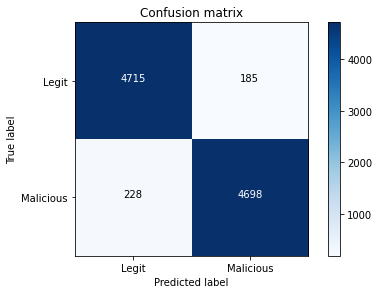

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1:]), return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy', f1_score, Precision(name="precision"), Recall(name="recall")])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

import matplotlib.pyplot as plt
from matplotlib.colors import *
 
def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

308/308 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9580


# Activation Tanh 64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# Activation tanh 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# Acitvation tanh 512

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1:]), return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# Relu 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1:]), return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# Relu 64

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

Epoch 1/50
662/874 [=====================>........] - ETA: 0s - loss: 0.4104 - accuracy: 0.8138

KeyboardInterrupt: 

# Relu 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# Relu 512

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1:]), return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# elu 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1:]), return_sequences=False, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# elu 64 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=False, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# elu 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=False, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# elu 512

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1:]), return_sequences=False, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# selu 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1:]), return_sequences=False, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# selu 64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=False, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# selu 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=False, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# selu 512

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1:]), return_sequences=False, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# softsign 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1:]), return_sequences=False, activation='softsign'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# softsign 64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=False, activation='softsign'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# softsign 128

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=False, activation='softsign'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)

# softsign 512

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.metrics import *
import keras_metrics as km

model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1:]), return_sequences=False, activation='softsign'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile( loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=Y_train,batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)

def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
target_names =["Legit","Malicious"]
print(plot_confusion_matrix(cm=matrix, classes=target_names, normalize=False))

model_val = model.evaluate(X_test, Y_test)